In [196]:
import numpy as np
import matplotlib.pyplot as plt

In [231]:
parties = ['A','B','C','F','I','M','O','V','Æ','Ø','Å']
valgforbund = [[0,10,3],[1,5,7],[2,4],[6],[8],[9]]

N = 10_000
M = 15

#Epinion poll 6/6
pollSize = 2085
mu = 1/100*np.array([17.7,4.9,8.3,16.6,8.5,6.0,6.4,10.8,8.9,7.8,4.1])
sigma = np.diag(np.sqrt(mu*(1-mu)/pollSize))**2

In [224]:
#Generate votes, assuming independent normal distrubutions
votes         = np.clip(np.random.multivariate_normal(mu,sigma,N),0,1)
norm_votes    = votes/np.expand_dims(np.linalg.norm(votes,1,axis = 1),1)

#Collect total votes for each valgforbund
vf_coll_votes = np.array([norm_votes[:,f].sum(axis=1) for i, f in enumerate(valgforbund)]).T

#Percentage of votes for each party in every valgforbund
vf_ind_votes  = [norm_votes[:,f] for f in valgforbund]
vf_ind_votes  = [viv/np.expand_dims(np.linalg.norm(viv,1,axis = 1),1) for viv in vf_ind_votes]

In [225]:
#Vectorized function for mandate count
def dhondt(V,M = M):
    mandates = np.zeros_like(V,dtype = np.int32)
    row_idx = np.arange(V.shape[0])
    for i in range(M):
        winner = np.argmax(V,axis = 1)
        mandates[row_idx,winner]+=1
        V[row_idx,winner]-=1/M
    return mandates

#Non-vectorized function for mandate count, because different M values
#Definitly not neccesary
def dhondt_ind(V, M=M):
    mandates = np.zeros_like(V,dtype = np.int32)
    for i in range(M):
        winner = np.argmax(V)
        mandates[winner]+=1
        V[winner]-=1/M
    return mandates

In [226]:
def flatten(xss):
    return [x for xs in xss for x in xs]

#Compute valgforbund mandates
m_forbund = dhondt(vf_coll_votes)

#Compute individual party mandates
finalMan = np.array(
            [flatten([dhondt_ind(vf_ind_votes[j][i],m) 
            for j,m in enumerate(mDist) ]) 
            for i,mDist in enumerate(m_forbund)])

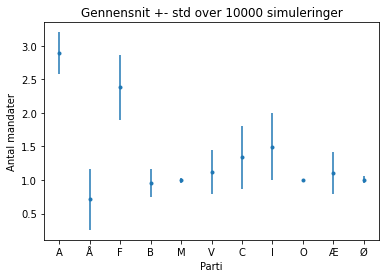

In [233]:
#Plot simulation statistics

mean= np.mean(finalMan,axis = 0)
std = np.std(finalMan,axis = 0)
p = [parties[i] for i in flatten(valgforbund)]
plt.errorbar(p, mean, std, linestyle='None', marker='.')
plt.xlabel('Parti')
plt.ylabel('Antal mandater')
plt.title(f'Gennensnit +- std over {N} simuleringer')
plt.show()